# 导包

In [1]:
# Import seaborn
import seaborn as sns

# Apply the default theme
sns.set_theme()
import json
import torch
import pickle
from torch import nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from config import get_config_regression
from easydict import EasyDict as edict

# 导入配置文件

In [127]:
args = get_config_regression('dmd', 'mosei', '/workspace/projects/mmsa/config/config_regression.json')

In [128]:
with open(args.featurePath, 'rb') as f:
    data = pickle.load(f)

In [129]:
data.keys()

dict_keys(['train', 'valid', 'test'])

In [130]:
data['test'].keys()

dict_keys(['raw_text', 'audio', 'vision', 'id', 'text', 'text_bert', 'audio_lengths', 'vision_lengths', 'annotations', 'classification_labels', 'regression_labels'])

In [131]:
# 获取数据集的label
# train_labels = data['train']['regression_labels']
# val_labels = data['valid']['regression_labels']
# test_labels = data['test']['regression_labels']

In [132]:
# train_labels.shape, val_labels.shape, test_labels.shape

In [133]:
# def get_label_arr(labels):
#     label_arr = np.zeros(7, dtype=np.int64)

#     for key in labels:
#         label_arr[int(np.round(key)) + 3] += 1

#     print(label_arr, f"sum:{sum(label_arr)}")
#     return label_arr

In [134]:
# get_label_arr(train_labels)
# get_label_arr(val_labels)
# get_label_arr(test_labels)

In [135]:
# get_label_arr(train_labels) + get_label_arr(val_labels) + get_label_arr(test_labels)

In [136]:
data['train']['text'].shape, data['train']['vision'].shape, data['train']['vision'].shape

((16326, 50, 768), (16326, 500, 35), (16326, 500, 35))

In [137]:
id = 35
data['test']['raw_text'][id], data['test']['regression_labels'][id]

("I think first it's important for individuals Who are in a relationship or in a marriage to acknowledged to themselves what really are their financial goals",
 1.0)

In [138]:
data['train']['raw_text']

array(["Key is part of the people that we use to solve those issues, whether it's stretch or outdoor resistance or abrasions or different technical aspects that we really need to solve to get into new markets, they've been able to bring solutions.",
       "They've been able to find solutions or at least bring some answers to the table.",
       "We're a huge user of adhesives for our operation, called flocking, and we don't have the technical inside compounding or the technical expertise to do these types of things.",
       ...,
       "Now, if this sounds like something you're interested in, all you need to do, down there in the description, type in your email, hit the send button, and then you're going to get a little roundup of all of this straight into your inbox",
       'I actually speak to the experts myself to give you the best value you can get',
       'And we’ve seen some programs, we’ve seen programs in Google where-- using micro marketing techniques so that I can be-- if

In [145]:
# 检测 id 和 raw-text 是否对应
index = 0
for id in data['train']['id']:
    if id == '7ZzbemE4QEE$_$27':
        break
    index += 1
print(index)

6206


In [146]:
data['train']['raw_text'][index], data['train']['regression_labels'][index]

('Getting a cash offer is what we do here at JM Equity Recovery LLC',
 0.3333333432674408)

# 可视化单个模态的字典激活分布区域

In [ ]:
l_att_weight = np.load('/workspace/projects/mmsa/visualization/l_att_weight_list.npy', allow_pickle=True)
v_att_weight = np.load('/workspace/projects/mmsa/visualization/v_att_weight_list.npy', allow_pickle=True)
a_att_weight = np.load('/workspace/projects/mmsa/visualization/a_att_weight_list.npy', allow_pickle=True)

In [ ]:
def get_data(att_weight):
    tmp = []
    for x in att_weight:
        tmp.append(x.tolist()[0])
    return tmp

In [ ]:
l_tmp, v_tmp, a_tmp = get_data(l_att_weight), get_data(v_att_weight), get_data(a_att_weight)

In [ ]:
def get_element_counts(arr):
    from collections import Counter

    # 将二维数组转换成一维数组
    flat_arr = [item for sublist in arr for item in sublist]

    # 使用 Counter 统计元素出现的次数
    element_counts = Counter(flat_arr)

    # 打印统计结果
    # print("元素出现的次数：", element_counts)
    return element_counts

In [ ]:
# l_element_counts = get_element_counts(l_tmp)
# v_element_counts = get_element_counts(v_tmp)
# a_element_counts = get_element_counts(a_tmp)

# pos_element_counts = get_element_counts(pos_tmp)
# neg_element_counts = get_element_counts(neg_tmp)

# lva_element_counts = get_element_counts(lva_tmp)

In [ ]:
# 遍历 Counter 对象的键值对
# for token, count in lva_element_counts.items():
#     print(f"Token: {token}, Count: {count}")

In [ ]:
import matplotlib.pyplot as plt

# # 过滤掉元素 0
# l_filtered_element_counts = {element: count for element, count in l_element_counts.items() if element != 0}

# # 提取过滤后的元素和出现次数
# l_elements = list(l_filtered_element_counts.keys())
# l_counts = list(l_filtered_element_counts.values())

# # same for vision
# v_filtered_element_counts = {element: count for element, count in v_element_counts.items() if element != 0}
# v_elements = list(v_filtered_element_counts.keys())
# v_counts = list(v_filtered_element_counts.values())

# # same for audio
# a_filtered_element_counts = {element: count for element, count in a_element_counts.items() if element != 0}
# a_elements = list(a_filtered_element_counts.keys())
# a_counts = list(a_filtered_element_counts.values())

# # same for pos
# pos_filtered_element_counts = {element: count for element, count in pos_element_counts.items() if element != 0}
# pos_elements = list(pos_filtered_element_counts.keys())
# pos_counts = list(pos_filtered_element_counts.values())

# same for neg
# neg_filtered_element_counts = {element: count for element, count in neg_element_counts.items() if element != 0}
# neg_elements = list(neg_filtered_element_counts.keys())
# neg_counts = list(neg_filtered_element_counts.values())

# 绘制直方图，设置小长方形边缘颜色为蓝色
# plt.bar(pos_elements, pos_counts, edgecolor='blue')
# plt.bar(neg_elements, neg_counts, edgecolor='blue')


# # 添加标题和标签（转换为英文）
# plt.title('Histogram of Element Occurrences (Excluding Element 0)')
# plt.xlabel('Element')
# plt.ylabel('Occurrences')

# # 显示图形
# plt.show()

In [ ]:
# len(l_elements), len(v_elements), len(a_elements)

# 字典 `token` 在迭代过程中的变化情况

In [7]:
epoch_index = 1 # 设置 epoch (1-?)
token_index = 0 # 设置 字典token (0-511)

# train_folder = 'May12_00-59-04_ea6f534ea7b8mosei'
# train_folder = 'May13_21-58-40_ea6f534ea7b8mosei'
train_folder = 'May14_06-23-11_ea6f534ea7b8mosei'

## 单个 `epoch` 内字典 `token` 的变化过程

### 单个字典 token

In [8]:
# 导入数据
dict_table = np.load(f'/workspace/projects/mmsa/visualization/{train_folder}/dict_table_{epoch_index}.npy', allow_pickle=True)

In [9]:
# 维度信息分别表示：迭代次数，字典大小，字典token的维度大小
print(f"The shape of dict_table is: {dict_table.shape}")
print(f"The type of dict_table is: {type(dict_table)}")

The shape of dict_table is: (1021, 512, 100)
The type of dict_table is: <class 'numpy.ndarray'>


In [10]:
np.sum(dict_table, axis=2).shape

(1021, 512)

In [11]:
dict_table = np.sum(dict_table, axis=2) / 100

In [12]:
dict_table.shape

(1021, 512)

Text(0.5, 32.249999999999986, 'Number of Iterations')

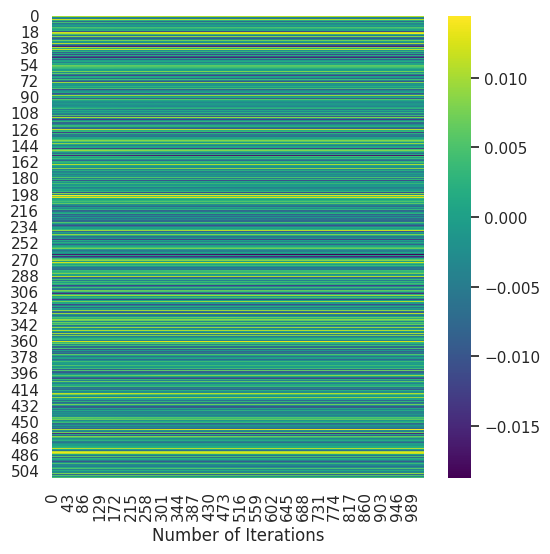

In [19]:
# 设置中文字体
plt.figure(figsize=(6, 6))
sns.heatmap(dict_table.T, cmap="viridis")

plt.xlabel('Number of Iterations')

## 多个 epoch 内字典 `token` 的变化情况

In [20]:
epoch_start = 1 # 设置 epoch (1-?)
epoch_end = 31 # 设置 字典token (0-511)

# train_folder = 'May12_00-59-04_ea6f534ea7b8mosei'
# train_folder = 'May13_21-58-40_ea6f534ea7b8mosei'
train_folder = 'May14_06-23-11_ea6f534ea7b8mosei'

dict_table_all = np.load(f'/workspace/projects/mmsa/visualization/{train_folder}/dict_table_{epoch_start}.npy', allow_pickle=True)[:, :, :]

for index in range(2, epoch_end + 1):
    dict_table_tmp = np.load(f'/workspace/projects/mmsa/visualization/{train_folder}/dict_table_{index}.npy', allow_pickle=True)
    # print(dict_table_tmp[:, 0, :].shape)
    # print(dict_table_all[:, 0, :].shape)
    dict_table_all = np.concatenate((dict_table_all, dict_table_tmp[:, :, :]), axis=0)

In [21]:
dict_table_all.shape

(31651, 512, 100)

In [22]:
dict_table_all = np.sum(dict_table_all, axis=2) / 100

In [23]:
dict_table_all.shape

(31651, 512)

In [24]:
# 每10次迭代更新1次
dict_table_all = dict_table_all[::10,:]

In [25]:
dict_table_all = dict_table_all.T

In [26]:
dict_table_all.shape

(512, 3166)

In [27]:
type(dict_table_all)

numpy.ndarray

In [28]:
# save the file to csv file
df = pd.DataFrame(dict_table_all.T)

In [29]:
df.to_csv(f'/workspace/projects/mmsa/visualization/{train_folder}/dict_by_iter.csv')

Text(0.5, 32.249999999999986, 'Number of Iterations')

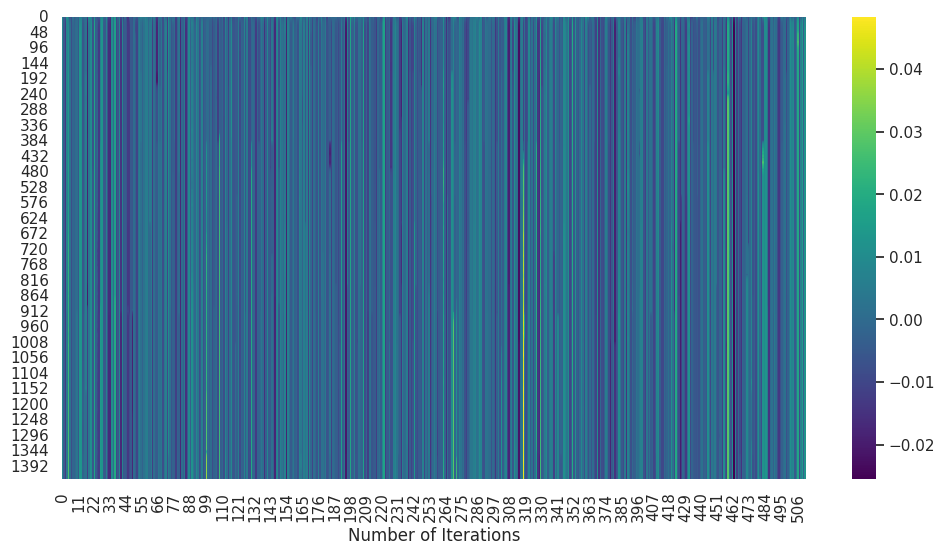

In [219]:
# 设置中文字体
plt.figure(figsize=(12, 6))
sns.heatmap(dict_table_all.T, cmap="viridis")

plt.xlabel('Number of Iterations')

# 查看相同类别下三种模态的激活的公共字典 token

In [250]:
# 设置训练文件名
train_name = 'May12_00-59-04_ea6f534ea7b8mosei'
# train_name = 'May13_21-58-40_ea6f534ea7b8mosei'
# train_name = 'May14_06-23-11_ea6f534ea7b8mosei'

In [251]:
# 标签
train_labels = np.load(f'/workspace/projects/mmsa/visualization/{train_name}/label_list.npy', allow_pickle=True)
# id
id_list = np.load(f'/workspace/projects/mmsa/visualization/{train_name}/ids_list.npy', allow_pickle=True)
# 原始文本
raw_text_list = np.load(f'/workspace/projects/mmsa/visualization/{train_name}/raw_text_list.npy', allow_pickle=True)
# 三种模态激活的字典token
lva_att_weight_train = np.load(f'/workspace/projects/mmsa/visualization/{train_name}/lva_att_weight_train.npy', allow_pickle=True)

In [252]:
# 转换成1维数组
train_labels = np.concatenate(train_labels, axis=0)[:,0]
id_list = np.concatenate(id_list, axis=0)
raw_text_list = np.concatenate(raw_text_list, axis=0)

In [253]:
# 总的训练集样本数量
train_labels.shape, id_list.shape, raw_text_list.shape

((16326,), (16326,), (16326,))

In [254]:
# label 转换
print("转换前：", train_labels)
train_labels = np.round(train_labels)
print("转换后：", train_labels)

转换前： [2.         1.3333334  0.6666667  ... 1.6666666  1.6666666  0.33333334]
转换后： [2. 1. 1. ... 2. 2. 0.]


In [255]:
set(train_labels)

{-3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0}

In [256]:
lva_att_weight_train.shape

(1021,)

In [257]:
# 每个元素表示一个batch的数据，0-15表示语言模态的数据，16-31表示视觉模态的数据，32-47表示音频模态的数据
lva_att_weight_train[0].shape

(48, 512)

In [258]:
# 最后一个不是18
lva_att_weight_train[-1].shape

(18, 512)

In [259]:
# 从 lva_att_weight_train 获取三种模态的数据
l_att_weight = []
v_att_weight = []
a_att_weight = []

for lva_att_weight in lva_att_weight_train:
    num = len(lva_att_weight) // 3
    l_att_weight.append(lva_att_weight[: num])
    v_att_weight.append(lva_att_weight[num : 2*num])
    a_att_weight.append(lva_att_weight[2*num :])
    

l_att_weight = np.concatenate(l_att_weight)
v_att_weight = np.concatenate(v_att_weight)
a_att_weight = np.concatenate(a_att_weight)

In [260]:
l_att_weight.shape, v_att_weight.shape, a_att_weight.shape

((16326, 512), (16326, 512), (16326, 512))

In [261]:
# 处理数据为第 1 维为 16326 数组，方便后续处理

In [262]:
# 7 分类
class_1 = [] # -3
class_2 = []
class_3 = []
class_4 = []
class_5 = []
class_6 = []
class_7 = []

# 2 分类
class_pos = []
class_neg = []
class_zero = []

# 单分类
class_all = []

## 分类

In [263]:
for data_l, data_v, data_a, label, id, raw_text in zip(l_att_weight, v_att_weight, a_att_weight, train_labels, id_list, raw_text_list):
    # print(data_l.shape, data_v.shape, data_a.shape, label)
    data_all = [data_l, data_v, data_a, label, id, raw_text]
    class_all.append(data_all)
    if label == -3:
        class_1.append(data_all)
    elif label == -2:
        class_2.append(data_all)
    elif label == -1:
        class_3.append(data_all)
    elif label == 0:
        class_4.append(data_all)
    elif label == 1:
        class_5.append(data_all)
    elif label == 2:
        class_6.append(data_all)
    elif label == 3:
        class_7.append(data_all)
    
    if label > 0:
        class_pos.append(data_all)
    elif label == 0:
        class_zero.append(data_all)
    elif label < 0:
        class_neg.append(data_all)

In [264]:
# 7 分类
len(class_1), len(class_2), len(class_3), len(class_4), len(class_5), len(class_6), len(class_7)

(311, 1305, 2039, 6798, 4117, 1549, 207)

In [265]:
# 2 分类
len(class_pos), len(class_zero), len(class_neg)

(5873, 6798, 3655)

In [266]:
# 单个类被
len(class_all)

16326

In [267]:
def random_select_sample(class_name, num):
    
    data_l, data_v, data_a, data_label, id, raw_text = class_name[num]
    # 查看标签
    # print(f"标签：{pos_label}")
    # # 查看语言模态 L 激活的字典token
    # print(f"语言模态({len(np.nonzero(pos_l)[0])}):",np.nonzero(pos_l)[0])
    # # 查看视觉模态 V 激活的字典token
    # print(f"视觉模态({len(np.nonzero(pos_v)[0])}):",np.nonzero(pos_v)[0])
    # # 查看音频模态 A 激活的字典token
    # print(f"音频模态({len(np.nonzero(pos_a)[0])}):",np.nonzero(pos_a)[0])
    # 查看3个模态的激活的公共字典token
    print(f"ID：{id}; 标签：{data_label}; 文本：{raw_text}")
    intersection = np.intersect1d(np.nonzero(data_l)[0], np.nonzero(data_v)[0])
    intersection = np.intersect1d(intersection, np.nonzero(data_a)[0])
    print(f"公共相应模态({len(intersection)}):",intersection + 1) # 处理下标为 0 的情况

In [268]:
# intersection + 1的愿意
np.nonzero(np.array([1, 1, 0, 1, 0]))

(array([0, 1, 3]),)

In [269]:
# 随机选择 1 个样本
# random_select_sample(class_pos, 200)
# random_select_sample(class_zero, 2000) 
random_select_sample(class_1, 200) # 2056

ID：266396$_$39; 标签：-3.0; 文本：Zooey (stutter) Deschanel, just stop
公共相应模态(7): [ 16  23 172 189 210 327 504]


In [436]:
# 查看 1 个类别下所有样本的三个模态激活的字典token
for num in range(len(class_7)):
    print(f"第{num}个样本：")
    random_select_sample(class_7, num)

第0个样本：
ID：83859$_$3; 标签：3.0; 文本：I believe it's one of the best, if not the best, cops-and-robbers good guy-bad buy film of all time
公共相应模态(7): [ 95 169 198 330 390 459 484]
第1个样本：
ID：HXuRR2eBHHQ$_$2; 标签：3.0; 文本：I'm the author of The Traveler's Gift and The Noticer, and I am really looking forward to being with you guys in Cleveland this summer.
公共相应模态(6): [ 95 169 330 390 459 484]
第2个样本：
ID：60037$_$2; 标签：3.0; 文本：This is one of my favorite movies
公共相应模态(7): [ 20  95 169 330 390 459 484]
第3个样本：
ID：gjEYmdWrBLM$_$28; 标签：3.0; 文本：I hope you have a great rest of the day if you're watching this in the morning
公共相应模态(8): [ 95 169 198 330 390 399 459 484]
第4个样本：
ID：266396$_$7; 标签：3.0; 文本：I mean, I loved his first three films
公共相应模态(7): [ 20  95 169 330 390 459 484]
第5个样本：
ID：6-0bcijTR8k$_$0; 标签：3.0; 文本：Hi there, today I have a very special announcement namely, I'll be attending the Origami USA convention this year, It's going to take place at Manhattan College in Riverdale, NY from June 19 to Ju

## 统计不同类别激活的字典分布

In [288]:
def get_data_table(class_tmp):
    data_table = np.zeros((5, 512))

    for data in class_tmp:
        data_l, data_v, data_a, label, _, _ =  data
        
        data_l_nonzero_indices = np.nonzero(data_l)[0]
        data_v_nonzero_indices = np.nonzero(data_v)[0]
        data_a_nonzero_indices = np.nonzero(data_a)[0]

        intersection = np.intersect1d(data_l_nonzero_indices, data_v_nonzero_indices)
        intersection = np.intersect1d(intersection, data_a_nonzero_indices)

        # union = np.union1d(data_l_nonzero_indices, data_v_nonzero_indices)
        # union = np.union1d(union, data_a_nonzero_indices)

        for x in data_l_nonzero_indices:
            data_table[0][x] += 1
            data_table[4][x] += 1
        for x in data_v_nonzero_indices:
            data_table[1][x] += 1
            data_table[4][x] += 1
        for x in data_a_nonzero_indices:
            data_table[2][x] += 1
            data_table[4][x] += 1
        for x in intersection:
            data_table[3][x] += 1
        # for x in union:
        #     data_table[4][x] += 1

    return data_table


In [289]:
data_table_1 = get_data_table(class_1)
data_table_2 = get_data_table(class_2)
data_table_3 = get_data_table(class_3)
data_table_4 = get_data_table(class_4)
data_table_5 = get_data_table(class_5)
data_table_6 = get_data_table(class_6)
data_table_7 = get_data_table(class_7)

In [290]:
data_table_pos = get_data_table(class_pos)
data_table_zero = get_data_table(class_zero)
data_table_neg = get_data_table(class_neg)

In [291]:
data_table_all = get_data_table(class_all)

In [292]:
data_table_all.shape

(5, 512)

In [295]:
data_l_non0_index = np.nonzero(data_table_all[0])[0]
data_v_non0_index = np.nonzero(data_table_all[1])[0]
data_a_non0_index = np.nonzero(data_table_all[2])[0]
data_lva_non0_index = np.nonzero(data_table_all[4])[0]

In [296]:
data_l_non0_index.shape, data_v_non0_index.shape, data_a_non0_index.shape, data_lva_non0_index.shape

((99,), (141,), (148,), (199,))

In [301]:
x = np.union1d(data_l_non0_index, data_v_non0_index)
x = np.union1d(x, data_a_non0_index)

In [ ]:
data_lva_non0_index

Text(0.5, 32.249999999999986, 'Token Index')

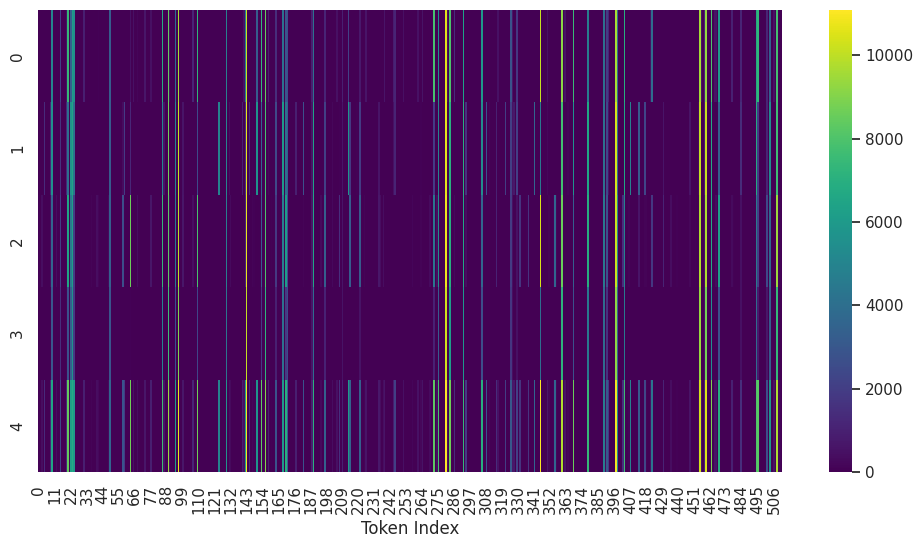

In [280]:
plt.figure(figsize=(12, 6))

# 自定义颜色条范围
# vmin = 0  # 最小值
# vmax = 320  # 最大值

# sns.heatmap(common, cmap="viridis", yticklabels=['Language', 'Vision', 'Audio', 'Common'])

sns.heatmap(data_table_all, cmap="viridis")

# plt.xticks(fontsize=5)
plt.xlabel('Token Index')

## 选择激活次数最多的前50个token

In [51]:
def get_activate_token(data):
    for idx in range(4):
        print(np.nonzero(data[idx])[0])
        print(f"激活字典token数量: {len(np.nonzero(data[idx])[0])}")

In [52]:
data_table_1.shape

(5, 512)

In [53]:
data_table_1[0].shape

(512,)

In [54]:
# 获取类别下三种模态激活的字典token分布
get_activate_token(data_table_1)

[  9  15  20  22  23  24  31  49  68  73  77  89  90  96  99 109 129 142
 143 150 153 156 158 163 171 188 205 209 211 225 238 244 264 272 280 286
 292 305 325 326 327 345 360 362 378 391 397 403 422 455 456 459 465 466
 489 494 495 503]
激活字典token数量: 58
[  9  15  19  20  22  23  24  31  41  49  59  60  86  89  94  96  99 129
 142 143 150 156 158 163 171 177 188 189 190 209 219 234 244 263 280 283
 292 305 315 325 326 327 360 368 378 391 397 403 413 430 448 455 459 463
 483 494 503]
激活字典token数量: 57
[  0   1   9  15  20  22  23  26  31  36  41  48  49  58  59  63  68  72
  77  79  89  90  96  98  99 117 129 132 137 143 147 148 156 160 163 166
 168 171 182 188 189 194 198 209 211 221 224 234 235 244 257 263 269 272
 274 280 283 286 292 294 315 325 326 327 329 335 336 345 351 354 360 378
 379 384 389 390 391 397 398 402 403 406 417 418 430 439 448 449 452 455
 463 466 468 478 490 494 499 501 503 506 509 510]
激活字典token数量: 102
[  9  15  20  22  23  49  89  96  99 129 143 156 163 171 188 209 2

In [352]:
def top_k_max(arr, k=50):
    # 一个示例的一维numpy数组
    # arr = np.array([10, 5, 8, 20, 3, 15])

    # 获取前k个最大值的下标
    top_k_indices = np.argsort(-arr)[:k]

    # print("前", k, "个最大值的下标:", end="")
    return top_k_indices

In [353]:
# test the top_k function
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
top_k_max(x, k = 5)

array([9, 8, 7, 6, 5])

In [354]:
lva_topk_all = top_k_max(data_table_all[4])

In [355]:
lva_topk_all

array([280, 143, 397,  96, 455, 459, 360,  89, 345, 508, 156, 283, 463,
       292,  85,  23, 403, 378,  20, 494, 109, 189, 368, 275, 468, 305,
       168, 129, 272,   9,  94, 153,  22, 170, 398, 389, 503,  24, 495,
        63,  49, 150, 171, 213, 142, 391, 325, 197, 221, 422])

In [356]:
data_table_all[4][lva_topk_all].astype(int)

array([32088, 31648, 30370, 29842, 29481, 29129, 25476, 25425, 25064,
       24885, 24198, 21926, 21369, 19936, 19356, 18865, 18526, 18148,
       17952, 17892, 17550, 17006, 16481, 15946, 15427, 14904, 14800,
       14480, 14145, 14124, 13858, 13857, 13567, 13135, 12915, 12598,
       12263, 11936, 11271, 10315,  9647,  8781,  8498,  7888,  7451,
        7245,  6763,  6415,  5751,  5658])

In [357]:
l_all = data_table_all[0][lva_topk_all].astype(int)
l_all = l_all[np.newaxis,:]

v_all = data_table_all[1][lva_topk_all].astype(int)
v_all = v_all[np.newaxis,:]

a_all = data_table_all[2][lva_topk_all].astype(int)
a_all = a_all[np.newaxis,:]

In [358]:
lva_all = np.concatenate((l_all, v_all, a_all), axis=0)

In [392]:
def get_m_all(index):
    l_class_1 = data_table_1[index][lva_topk_all].astype(int)
    l_class_1 = l_class_1[np.newaxis,:]

    l_class_2 = data_table_2[index][lva_topk_all].astype(int)
    l_class_2 = l_class_2[np.newaxis,:]

    l_class_3 = data_table_3[index][lva_topk_all].astype(int)
    l_class_3 = l_class_3[np.newaxis,:]

    l_class_4 = data_table_4[index][lva_topk_all].astype(int)
    l_class_4 = l_class_4[np.newaxis,:]

    l_class_5 = data_table_5[index][lva_topk_all].astype(int)
    l_class_5 = l_class_5[np.newaxis,:]

    l_class_6 = data_table_6[index][lva_topk_all].astype(int)
    l_class_6 = l_class_6[np.newaxis,:]

    l_class_7 = data_table_7[index][lva_topk_all].astype(int)
    l_class_7 = l_class_7[np.newaxis,:]

    l_all = np.concatenate((l_class_7, l_class_6, l_class_5, l_class_4, l_class_3, l_class_2, l_class_1), axis=0)
    return l_all

In [393]:
l_all = get_m_all(0)
v_all = get_m_all(1)
a_all = get_m_all(2)

In [394]:
lva_all = np.concatenate((l_all, v_all, a_all), axis=0)

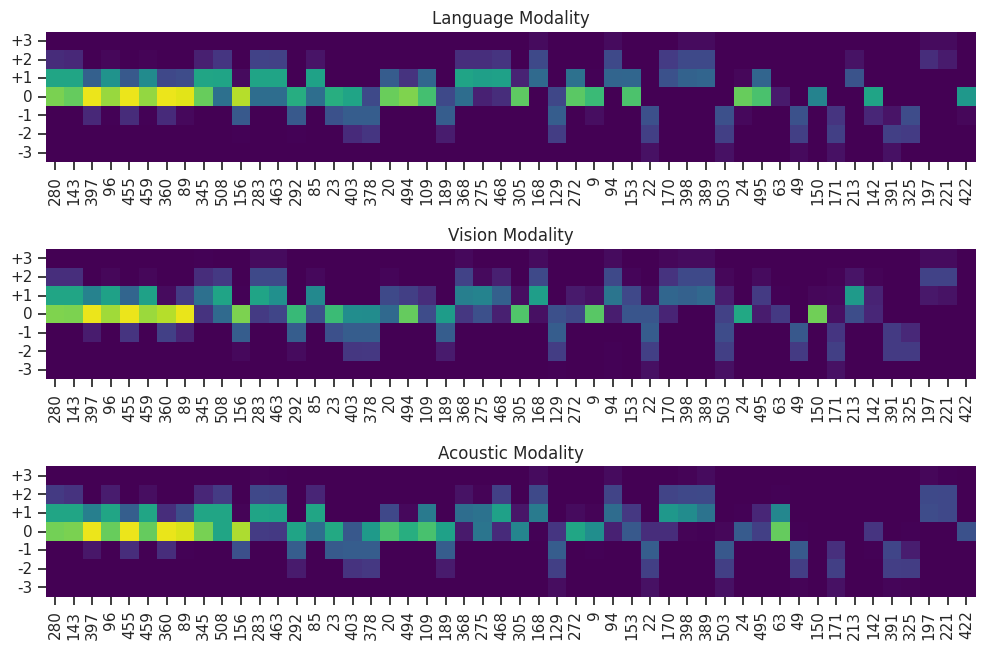

In [427]:
plt.figure(figsize = (12, 8))

# 自定义颜色条范围
vmin = 0  # 最小值
vmax = 7000  # 最大值

# sns.heatmap(common, cmap="viridis", yticklabels=['Language', 'Vision', 'Audio', 'Common'])
plt.subplot(311) # 第一个画板的第一个子图
ax1 = sns.heatmap(l_all, cmap="viridis",square=True,
                xticklabels=lva_topk_all,
                yticklabels=['+3', '+2', '+1', '0', '-1', '-2', '-3'],
                vmax=vmax, vmin=vmin,
                cbar=False)

ax1.xaxis.tick_bottom()
ax1.yaxis.tick_left()
ax1.title.set_text('Language Modality')

plt.subplot(312) # 第一个画板的第二个子图

# 自定义颜色条范围
vmin = 0  # 最小值
vmax = 7000  # 最大值

# sns.heatmap(common, cmap="viridis", yticklabels=['Language', 'Vision', 'Audio', 'Common'])

ax1 = sns.heatmap(v_all, cmap="viridis",square=True,
                xticklabels=lva_topk_all,
                yticklabels=['+3', '+2', '+1', '0', '-1', '-2', '-3'],
                vmax=vmax, vmin=vmin,
                cbar=False)

ax1.xaxis.tick_bottom()
ax1.yaxis.tick_left()
ax1.title.set_text('Vision Modality')

plt.subplot(313) # 第一个画板的第二个子图

# 自定义颜色条范围
vmin = 0  # 最小值
vmax = 7000  # 最大值

# sns.heatmap(common, cmap="viridis", yticklabels=['Language', 'Vision', 'Audio', 'Common'])

ax1 = sns.heatmap(a_all, cmap="viridis",square=True,
                xticklabels=lva_topk_all,
                yticklabels=['+3', '+2', '+1', '0', '-1', '-2', '-3'],
                vmax=vmax, vmin=vmin,
                cbar=False)

ax1.xaxis.tick_bottom()
ax1.yaxis.tick_left()
ax1.title.set_text('Acoustic Modality')

In [418]:
a_all[0]

array([  4,   4,   2,   1,   2,   2,   2,   0,   2,   4,   2,  77,  38,
         0,   2,   0,   1,   0,   0,   0,   0,   0,   0,   0,   6,   0,
       205,   0,   0,   2, 207,   2,   0,   6,  81, 207,   2,   2,   0,
         0,   0,   0,   0,   0,   0,   0,   1, 112,  49,   0])

In [234]:
l_topk_pos = top_k_max(data_table_pos[0])
v_topk_pos = top_k_max(data_table_pos[1])
a_topk_pos = top_k_max(data_table_pos[2])
c_topk_pos = top_k_max(data_table_pos[3])

In [235]:
def check_topk(data_table):
    l_topk = top_k_max(data_table[0])
    v_topk = top_k_max(data_table[1])
    a_topk = top_k_max(data_table[2])
    c_topk = top_k_max(data_table[3])
    print("Language:", l_topk)
    print("Vision:", v_topk)
    print("Audio:", a_topk)
    print("Common:", c_topk)
    intersection = np.intersect1d(l_topk, v_topk)
    intersection = np.intersect1d(intersection, a_topk)
    print("Intersection:", intersection)
    print("Intersection:", len(intersection))

In [236]:
check_topk(data_table_pos)

Language: [283 463 508 468 368 280 143 275 345  85 168 389  94 398  96]
Vision: [283 168 508 463 280 143 368  94 459 213  96 389 398 345  85]
Audio: [283 463 508 468 280 170 143 398 345  85 168  96 389 459  94]
Common: [283 508 280 143 463 168 389  96 398 459  85 345  94 468 275]
Intersection: [ 85  94  96 143 168 280 283 345 389 398 463 508]
Intersection: 12


In [237]:
check_topk(data_table_neg)

Language: [503  22 129  49 378 403 325 171 189  15 391 292 156  23 163]
Vision: [ 22 129 503 378 403  49 171 189 391 163 292 156 325  23  15]
Audio: [ 22 129 503  49 378 403 391 171 189 292  23  15 325 163 156]
Common: [ 22 129 503 378  49 403 189 171 292 325 156  23 391  15 163]
Intersection: [ 15  22  23  49 129 156 163 171 189 292 325 378 391 403 503]
Intersection: 15


In [238]:
check_topk(data_table_1)

Language: [ 31  22 286  15 244 188 503 209 171 158 163 391 326 456 238]
Vision: [171  15 326 188 448 209 327 430 234  99 315  86 503 244  22]
Audio: [ 22  15 171 503 315 430 234 188  99  77 209 326  68 274 466]
Common: [171  15 188 209 326 503  22 244 391 129  49 163 325 378  23]
Intersection: [ 15  22 171 188 209 326 503]
Intersection: 7


In [239]:
check_topk(data_table_2)

Language: [ 22 503 171  15  49 391 129 325 163 378 286 403 209 158 188]
Vision: [171  22 503 129  49 391 325 163 378 403  15 189 315 234 448]
Audio: [ 22 503 171  15 129 163 391  49 325 378 403 430 315 189 292]
Common: [ 22 503 171 129  49 391 325  15 378 163 403 189 188 209 326]
Intersection: [ 15  22  49 129 163 171 325 378 391 403 503]
Intersection: 11


In [240]:
check_topk(data_table_3)

Language: [403 378 129 189 292 156  23  49 503  22 325 171 455 360 397]
Vision: [378 403 189 129 292 156  22  49  23 503 360 391 163 171 455]
Audio: [378 129 292 403 189  22  23  49 503 156 391 171 455 360 325]
Common: [403 378 129 189 292  22 156  49  23 503 171 455 360 325 397]
Intersection: [ 22  23  49 129 156 171 189 292 360 378 403 455 503]
Intersection: 13


In [241]:
check_topk(data_table_4)

Language: [397 455 360  89 156  96 459 494 280  20 345  24 143 305 272]
Vision: [397 455  89 360  96 459 280 143 156 150 494   9 305  23 292]
Audio: [397 455 360  89 156 143 345 280  96 459  63  20 109 494  23]
Common: [397 455  89 360 156 280  96 459 143  23 292 494   9 305 508]
Intersection: [ 89  96 143 156 280 360 397 455 459 494]
Intersection: 10


In [242]:
check_topk(data_table_5)

Language: [280 143 345 463 283 508 368  85 468 275  96 459 272 168 109]
Vision: [143 280 508 283 459  96 168 213 463  85 124 407 275 397 368]
Audio: [280 143 345  96  85 508 459 283 463 468 170 398  63 397 168]
Common: [143 280 508 283  96 463 459  85 345 275 168 389 368 397 468]
Intersection: [ 85  96 143 168 280 283 459 463 508]
Intersection: 9


In [243]:
check_topk(data_table_6)

Language: [398 389  94 168 283 463 329 170 508 468 501 392 368 275 197]
Vision: [283 168 389 463  94 398 413 197 221 368 329  59 508 483 170]
Audio: [168 389 197 398 221 283 501 463  94 170 468 508 280 143 345]
Common: [389 168 398  94 283 463 508 170 197 280 143 501 468 221 345]
Intersection: [ 94 168 170 197 283 389 398 463 508]
Intersection: 9


In [244]:
check_topk(data_table_7)

Language: [458  94 398 106 501 389 392 197 168 483 329 477 221 316  65]
Vision: [463 283 197  19 389 413 398 221 483 329   8  94  59 168 458]
Audio: [389  94 329 168 458 483 106   2  12 237   8 435  40 477 197]
Common: [389  94 329 168 483 458 197  19 398 221 283 463 501 170 508]
Intersection: [ 94 168 197 329 389 458 483]
Intersection: 7


In [229]:
def get_topk_by_modality(data_table):
    l_topk = top_k_max(data_table[0])
    v_topk = top_k_max(data_table[1])
    a_topk = top_k_max(data_table[2])
    union = np.union1d(l_topk, v_topk)
    union = np.union1d(union, a_topk)
    print(union, len(union))
    print(data_table[0][union].astype(int))
    print(data_table[1][union].astype(int))
    print(data_table[2][union].astype(int))

In [231]:
get_topk_by_modality(data_table_pos)

[ 85  94  96 143 168 170 213 275 280 283 345 368 389 398 459 463 468 508] 18
[4384 4012 3721 4907 4130 2961 2127 4856 4986 5481 4722 5022 4018 3933
 3391 5470 5024 5193]
[3430 4481 4124 5020 5661 3426 4136 3309 5022 5852 3476 4520 4077 3892
 4136 5245 2749 5274]
[4844 4076 4643 5134 4644 5163    0 2697 5299 5703 4878 2833 4417 4993
 4369 5528 5309 5320]


In [43]:
l_topk_neg = top_k_max(data_table_neg[0])
v_topk_neg = top_k_max(data_table_neg[1])
a_topk_neg = top_k_max(data_table_neg[2])
c_topk_neg = top_k_max(data_table_neg[3])

前 15 个最大值的下标:前 15 个最大值的下标:前 15 个最大值的下标:前 15 个最大值的下标:

In [55]:
c_topk_neg

array([ 22, 129, 503, 378,  49, 403, 189, 171, 292, 325, 156,  23, 391,
        15, 163])

In [44]:
get_topk_by_modality(l_topk_neg, v_topk_neg, a_topk_neg, data_table_neg)

[ 15  22  23  49 129 156 163 171 189 292 325 378 391 403 503] 15
[2040 3316 1756 3190 3297 1960 1400 2670 2569 1974 2826 3106 1975 2880
 3337]
[1422 3609 1734 3100 3310 2166 2371 2705 2534 2220 1994 3170 2401 3167
 3210]
[1947 3641 1976 3273 3553 1718 1797 2556 2543 2529 1874 3166 2827 3058
 3504]


In [45]:
l_topk = l_topk_neg
v_topk = v_topk_neg
a_topk = a_topk_neg
data_table = data_table_neg

In [46]:
union = np.union1d(l_topk, v_topk)
union = np.union1d(union, a_topk)
union, len(union)

(array([ 15,  22,  23,  49, 129, 156, 163, 171, 189, 292, 325, 378, 391,
        403, 503]),
 15)

In [47]:
data_table[0][union].astype(int)

array([2040, 3316, 1756, 3190, 3297, 1960, 1400, 2670, 2569, 1974, 2826,
       3106, 1975, 2880, 3337])

In [48]:
data_table[1][union].astype(int)

array([1422, 3609, 1734, 3100, 3310, 2166, 2371, 2705, 2534, 2220, 1994,
       3170, 2401, 3167, 3210])

In [49]:
data_table[2][union].astype(int)

array([1947, 3641, 1976, 3273, 3553, 1718, 1797, 2556, 2543, 2529, 1874,
       3166, 2827, 3058, 3504])

In [54]:
data_table[3][union].astype(int)

array([1418, 3287, 1657, 2893, 3260, 1701,  971, 2447, 2468, 1955, 1714,
       3076, 1560, 2865, 3110])

In [50]:
def get_intersect(m1, m2):
    m12 = np.intersect1d(m1, m2)
    print(f"m1 与 m2 的交集: {m12}")
    print(f"The length: {len(m12)}")

In [51]:
get_intersect(l_topk_pos, v_topk_pos)
get_intersect(l_topk_pos, a_topk_pos)
get_intersect(v_topk_pos, a_topk_pos)

m1 与 m2 的交集: [ 85  94  96 143 168 280 283 345 368 389 398 463 508]
The length: 13
m1 与 m2 的交集: [ 85  94  96 143 168 280 283 345 389 398 463 468 508]
The length: 13
m1 与 m2 的交集: [ 85  94  96 143 168 280 283 345 389 398 459 463 508]
The length: 13


In [52]:
get_intersect(l_topk_neg, v_topk_neg)
get_intersect(l_topk_neg, a_topk_neg)
get_intersect(v_topk_neg, a_topk_neg)

m1 与 m2 的交集: [ 15  22  23  49 129 156 163 171 189 292 325 378 391 403 503]
The length: 15
m1 与 m2 的交集: [ 15  22  23  49 129 156 163 171 189 292 325 378 391 403 503]
The length: 15
m1 与 m2 的交集: [ 15  22  23  49 129 156 163 171 189 292 325 378 391 403 503]
The length: 15


In [53]:
get_intersect(l_topk_pos, l_topk_neg)
get_intersect(v_topk_pos, v_topk_neg)
get_intersect(a_topk_pos, a_topk_neg)

m1 与 m2 的交集: []
The length: 0
m1 与 m2 的交集: []
The length: 0
m1 与 m2 的交集: []
The length: 0


Text(0.5, 32.249999999999986, 'Token Index')

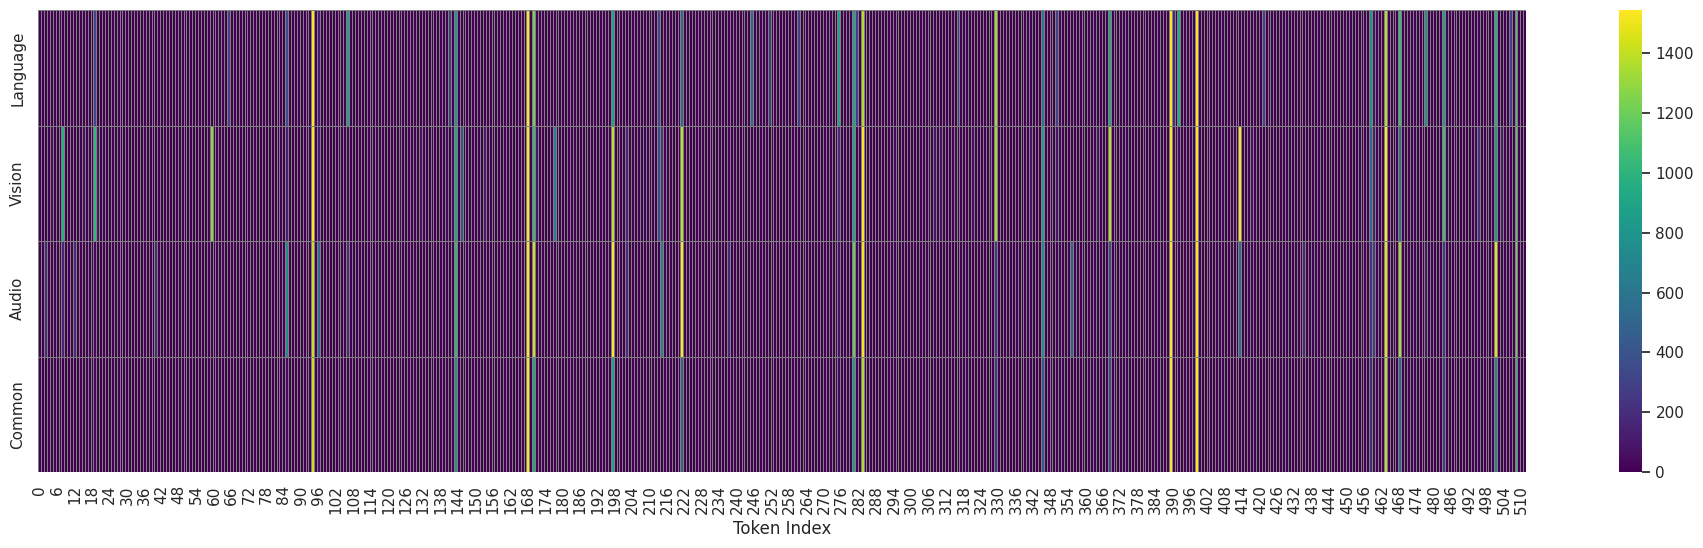

In [184]:
plt.figure(figsize=(24, 6))

# 自定义颜色条范围
# vmin = 0  # 最小值
# vmax = 320  # 最大值

sns.heatmap(data_table_6[:4,:], cmap="viridis",
            yticklabels=['Language', 'Vision', 'Audio', 'Common'],
            linewidths=0.5, linecolor='grey')

# plt.xticks(fontsize=5)
plt.xlabel('Token Index')

Text(0.5, 32.249999999999986, 'Token Index')

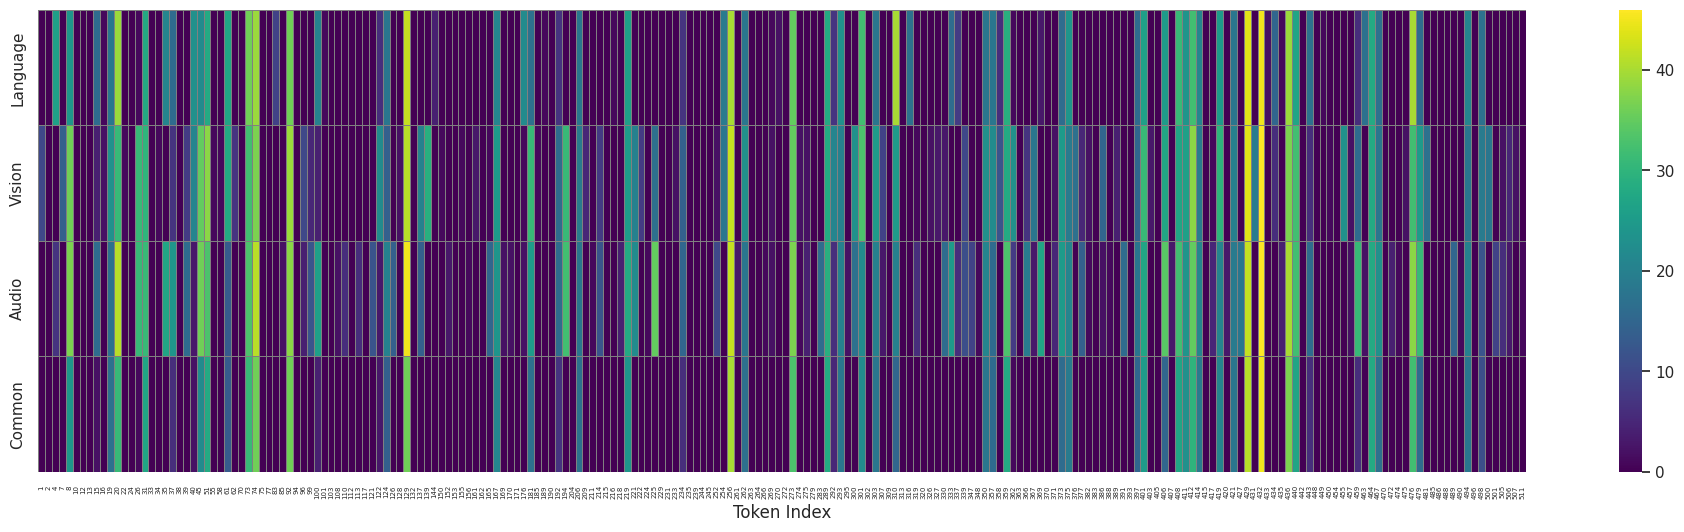

In [122]:
data_view = data_table_7

plt.figure(figsize=(24, 6))

# 自定义颜色条范围
vmin = 0  # 最小值
vmax = 320  # 最大值

sns.heatmap(data_view[:4], cmap="viridis", xticklabels=unique_array, yticklabels=['Language', 'Vision', 'Audio', 'Common'],
            linewidths=0.5, linecolor='grey')

plt.xticks(fontsize=5)
plt.xlabel('Token Index')